## Dillan Gump

## DSI06

## Week 1

# Python Self-Sufficiency Exam

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### 1. Create a function that reverses a string.

In [2]:
def reverse_string (text_string):
    text_reversed = text_string[::-1]
    return(text_reversed)

reverse_string('tomorrow and tomorrow and tomorrow')

'worromot dna worromot dna worromot'

##### 2. Complete the function below that can be used to calculate and return the posterior probability of an event A, given the known outcome of Event B using Bayes Theorem:

In [3]:
def bayes(a, b_given_a, b_given_not_a):

    """
    Calculates P(A | B) using bayes theorem.

    Args:
        a: P(A)
        b_given_a: P(B | A)
        b_given_not_a: P(B | ~A)

    Returns:
        P(A | B)
    """

    # YOUR CODE GOES HERE
    
    # bayes theorem:
    # P(A\B) = (P(B|A) * P(A)) / ( (P(B\A) * P(A)) + (P(B|A') * P(A')) )
    
    post_prob = (b_given_a * a) / ((b_given_a * a) + b_given_not_a * (1 - a))
    return post_prob

print(bayes(0.5, 0.3, 0.8))

0.2727272727272727


##### 3. Analyze the [teams](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lahman-teams.csv) dataset from the Lahman baseball records. This dataset contains season statistics for each Major League Baseball team.

In [4]:
url = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lahman-teams.csv'
teams = pd.read_csv(url)

In [5]:
# teams.isnull().sum()
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2




a.  For all records since 1995, plot histograms for the following variables. Which distribution do they appear to follow? Consider what each variable is measuring along with the histogram's shape.

In [6]:
teams_95 = teams.loc[teams['yearID']>=1995]

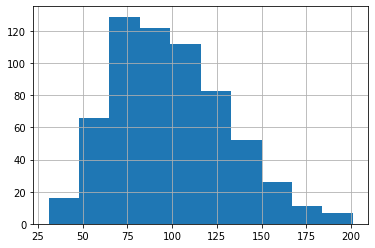

In [7]:
# stolen bases
teams_95.SB.hist()
plt.show()

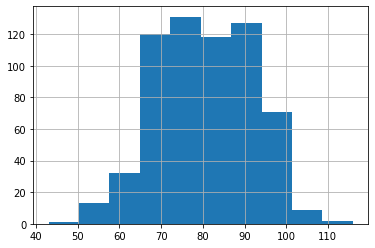

In [8]:
# Wins
teams_95.W.hist()
plt.show()

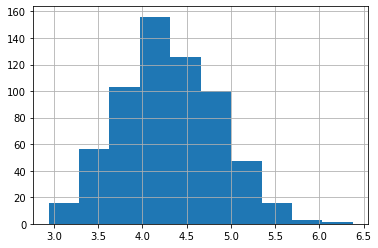

In [9]:
# Earned run average
teams_95.ERA.hist()
plt.show()

Stolen bases seems to skew right, with most bases stolen by a team a year being around 100. Most teams probably steal an average number of bases, while teams that steal significantly more may be interesting based on the year or other factors. WIns skews left, meaning most teams are going to win an average amount, with some teams underperforming. There will be a ceiling effect, as there are only so many games in  year. Earned run average seems fairly normal, with a slight right skew. On most teams, most players will be average, so this feature is doubly affected by averaging affects. ERA is likewise likely pretty normal. Exact distribution identification requires further analysis.